In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 15]

In [3]:
c1_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-1.txt/knownResults.txt", sep = "\t")
c2_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-2.txt/knownResults.txt", sep = "\t")
c3_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-3.txt/knownResults.txt", sep = "\t")
c4_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-4.txt/knownResults.txt", sep = "\t")
c5_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-5.txt/knownResults.txt", sep = "\t")
c6_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-6.txt/knownResults.txt", sep = "\t")
c7_motifs = pd.read_csv("mknown_results/Motifs-arnt-arnt2_signal-at_all-Npas4-peaks_fileSortedRegions-K7-1_cluster-7.txt/knownResults.txt", sep = "\t")


In [4]:
#make array of motif enrichment tables
c_motifs = [c1_motifs, c2_motifs, c3_motifs, c4_motifs, c5_motifs, c6_motifs, c7_motifs]

In [5]:
for i,df in enumerate(c_motifs):
    df["% of Target Sequences with Motif"] = df["% of Target Sequences with Motif"].map(lambda pct_str:float(pct_str[:-1]))
    df["% of Background Sequences with Motif"] = df["% of Background Sequences with Motif"].map(lambda pct_str:float(pct_str[:-1]))
    df["target minus background"] = df["% of Target Sequences with Motif"] - df["% of Background Sequences with Motif"]
    df["target over background"] = df["% of Target Sequences with Motif"] / df["% of Background Sequences with Motif"]
    df = df.sort_values(by=["Motif Name"])
    df["index"] = df["Motif Name"]
    df = df.set_index("index")
    
    c_motifs[i] = df
    

In [6]:
d_diff = {'cluster '+str(i+1) : list(c_motifs[i]["target minus background"]) for i in range(len(c_motifs))}

In [8]:
diff = pd.DataFrame(data = d_diff, index = list(c_motifs[0]["Motif Name"]))

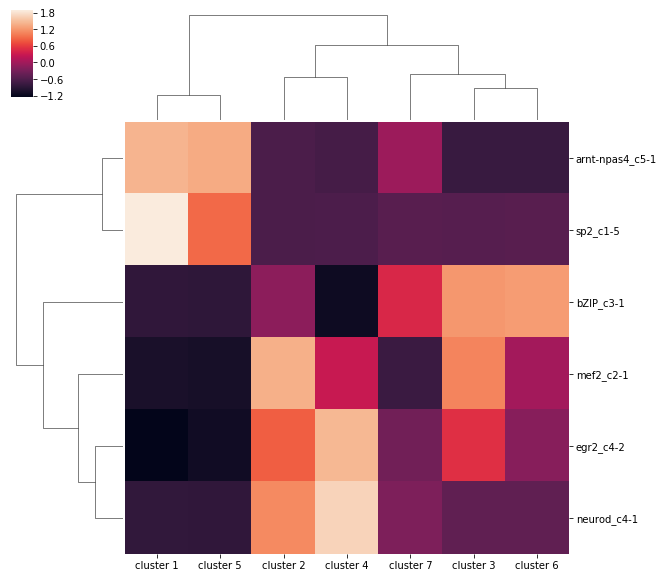

In [11]:
ax = sns.clustermap(diff, z_score = 0)
ax.savefig('target_minus_bg_clustered_Motifs_fromNpas4Clusters_heatmap.pdf')